In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_analyst = df[df["job_title_short"] == "Data Analyst"].copy()
df_analyst

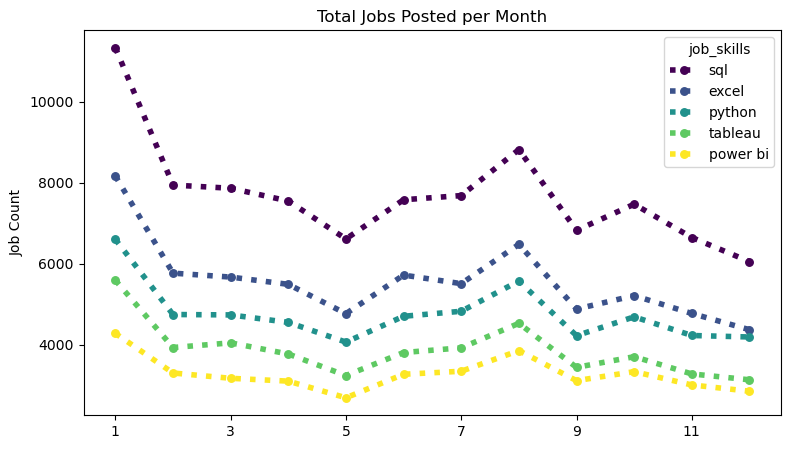

In [26]:
df_analyst["job_posted_month_no"] = df_analyst["job_posted_date"].dt.month
df_analyst_explode = df_analyst.explode("job_skills")
df_analyst_pivot = df_analyst_explode.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)
df_analyst_pivot.loc["Total"] = df_analyst_pivot.sum()
df_analyst_plot = df_analyst_pivot[df_analyst_pivot.loc["Total"].sort_values(ascending=False).index]
df_analyst_plot = df_analyst_plot.drop("Total")
df_analyst_plot.iloc[:, :5].plot(
    kind="line",
    linewidth=4,
    linestyle=":",
    colormap="viridis",
    marker="o",
    markersize=5.4,
    figsize=(9,5)
)
plt.title("Total Jobs Posted per Month")
plt.ylabel("Job Count")
plt.xlabel("")
plt.show()


Line Style: Solid ('-'), dashed ('--'), dash-dot ('-.'), dotted (':').
Line Width: The width of the line can be specified using the linewidth or lw parameter.
Line Color: The color of the line can be specified using the color parameter.